In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_train.csv
/kaggle/input/loan-data-set/loan_test.csv


**1. Mengimpor library yang akan digunakan di notebook ini.**

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

**2. Setelah mengimpor library, impor juga dataset yang akan digunakan. Disini kami menggunakan data training**

In [254]:
# proses import data training
df = pd.read_csv("/kaggle/input/loan-data-set/loan_train.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [256]:
print(df.shape)

(614, 12)


*Seperti yang bisa dilihat, 13 kolom dapat dibaca. Juga dapat dilihat bahwa ada 614 pengamatan dalam kumpulan data.*

**4. Bagian ini akan melakukan eksplorasi data set data "training" yang telah diimpor.
Jenis variabel pertama yang akan saya jelajahi adalah variabel kategori.**

*** Gender**

In [257]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

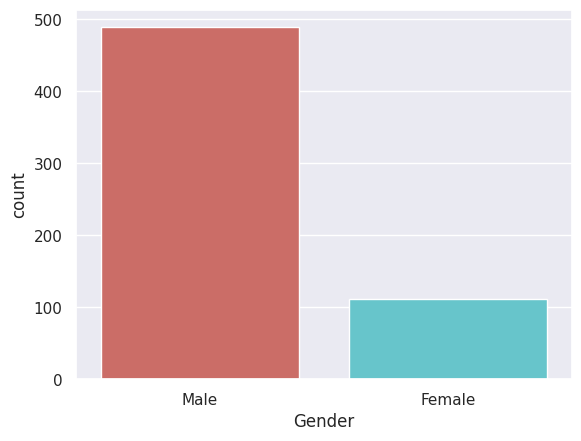

In [258]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [259]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


*Dari hasil di atas, jumlah pelamar pria lebih banyak dibandingkan dengan pelamar wanita. Bisa juga dilihat ada missing value di kolom ini.*

*** Married**

In [260]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

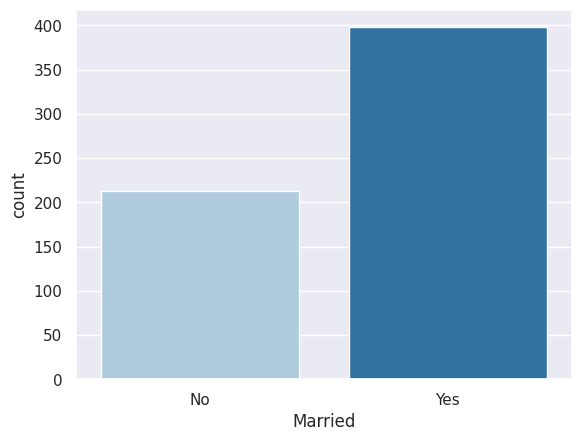

In [261]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

*Jumlah pelamar yang sudah menikah lebih banyak dibandingkan dengan pelamar yang belum menikah. Bisa juga dilihat ada sejumlah kecil nilai yang hilang di kolom ini.*

In [262]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


*** Education**

In [263]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

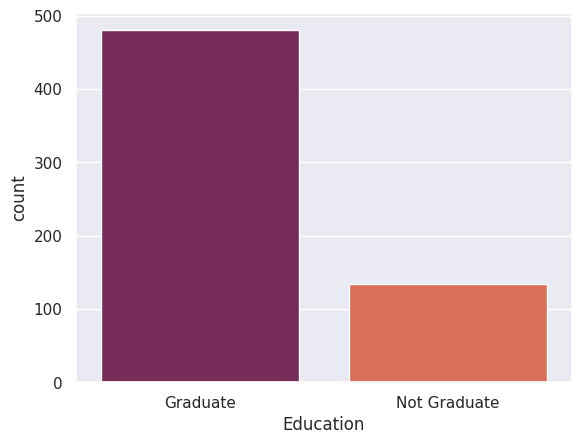

In [264]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [265]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


*Jumlah pelamar yang lulus lebih banyak dibandingkan dengan pelamar yang belum lulus.*

*** Self Employed**

In [266]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

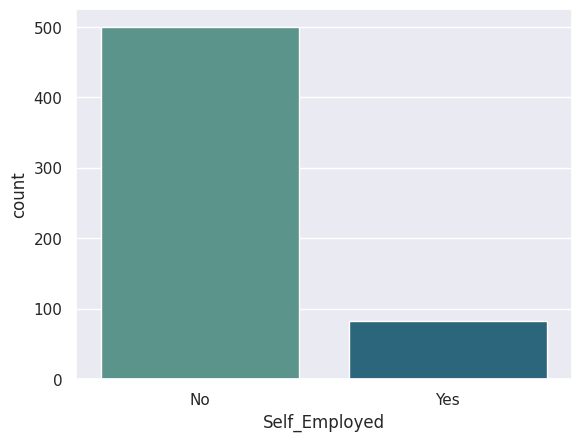

In [268]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [269]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


*Jumlah pelamar yang bukan wiraswasta lebih tinggi dibandingkan dengan pelamar yang wiraswasta. Bisa juga dilihat, ada missing value di kolom ini.*

*** Credit History**

In [270]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

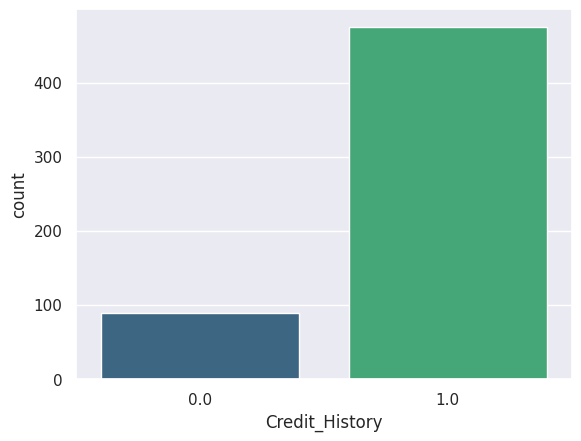

In [271]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [272]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


*The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.*

*** Area**

In [273]:
df.Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Area, dtype: int64

In [274]:
countUrban = len(df[df.Area == 'Urban'])
countRural = len(df[df.Area == 'Rural'])
countSemiurban = len(df[df.Area == 'Semiurban'])
countNull = len(df[df.Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


*Kolom ini memiliki distribusi yang berimbang antara kawasan properti Urban, Rural, dan Semiurban. Hal ini juga dapat dilihat tidak ada nilai yang hilang.*

*** Status**

In [275]:
df.Status.value_counts(dropna=False)

Y    422
N    192
Name: Status, dtype: int64

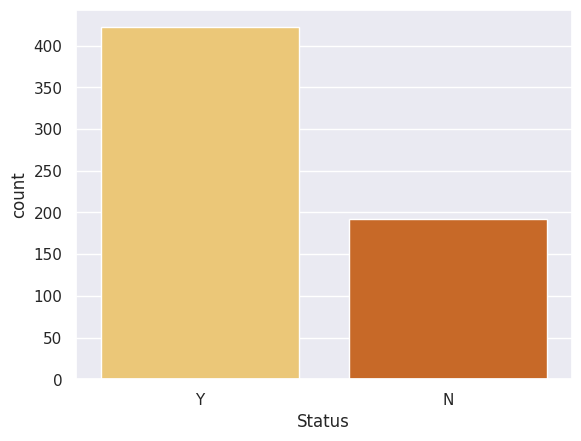

In [276]:
sns.countplot(x="Status", data=df, palette="YlOrBr")
plt.show()

In [277]:
countY = len(df[df.Status == 'Y'])
countN = len(df[df.Status == 'N'])
countNull = len(df[df.Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


*Jumlah pinjaman yang disetujui lebih tinggi dibandingkan pinjaman yang ditolak. Dapat dilihat juga, tidak ada missing value pada kolom ini.*

*** Term**

In [278]:
df.Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Term, dtype: int64

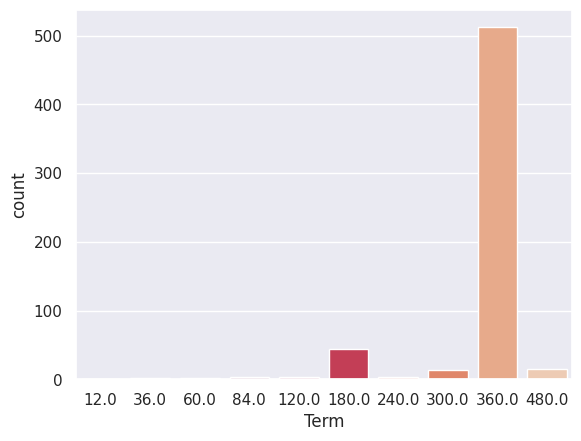

In [279]:
sns.countplot(x="Term", data=df, palette="rocket")
plt.show()

In [280]:
count12 = len(df[df.Term == 12.0])
count36 = len(df[df.Term == 36.0])
count60 = len(df[df.Term == 60.0])
count84 = len(df[df.Term == 84.0])
count120 = len(df[df.Term == 120.0])
count180 = len(df[df.Term == 180.0])
count240 = len(df[df.Term == 240.0])
count300 = len(df[df.Term == 300.0])
count360 = len(df[df.Term == 360.0])
count480 = len(df[df.Term == 480.0])
countNull = len(df[df.Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


*Seperti yang terlihat dari hasil, durasi pinjaman 360 hari adalah yang paling populer dibandingkan yang lain.*

**5. Variabel kedua yang akan kami gali adalah variabel kategorikal.**

*Bagian ini akan menampilkan mean, count, std, min, max dan lain-lain menggunakan fungsi.*

In [281]:
df[['Applicant_Income','Coapplicant_Income','Loan_Amount']].describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount
count,6.140000e+02,6.140000e+02,6.140000e+02
mean,5.403459e+05,1.621246e+05,1.414104e+07
std,6.109042e+05,2.926248e+05,8.815682e+06
min,1.500000e+04,0.000000e+00,0.000000e+00
25%,2.877500e+05,0.000000e+00,9.800000e+06
50%,3.812500e+05,1.188500e+05,1.250000e+07
75%,5.795000e+05,2.297250e+05,1.647500e+07
max,8.100000e+06,4.166700e+06,7.000000e+07


***6. ⬇️Pada bagian ini, kami akan menunjukkan distribusi variabel numerik menggunakan histogram dan violin plot.***

* Histogram Distribution

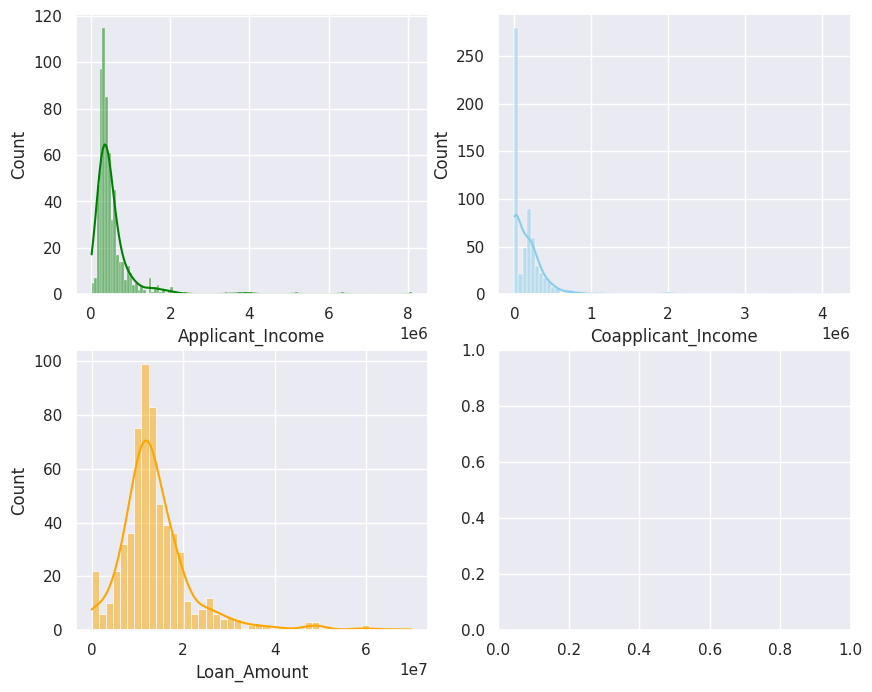

In [282]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="Applicant_Income", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="Coapplicant_Income", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="Loan_Amount", kde=True, ax=axs[1, 0], color='orange');

* Violin Plot

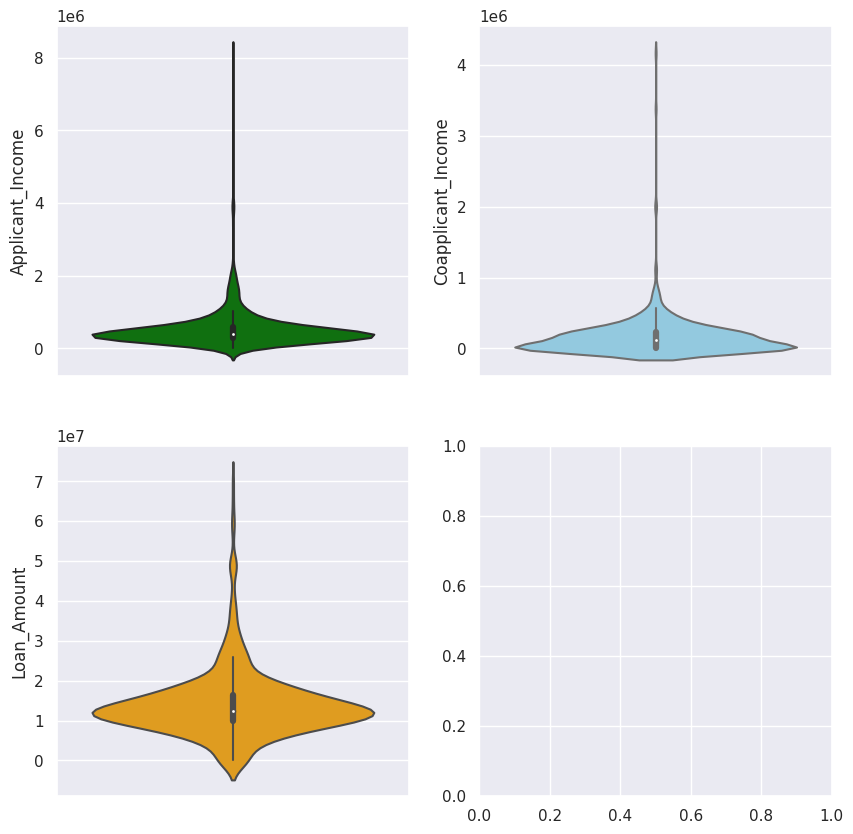

In [283]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="Applicant_Income", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="Coapplicant_Income", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="Loan_Amount", ax=axs1[1, 0], color='orange');

*Distribusi pendapatan Applicant income, Co Applicant Income, dan Amount positif, memiliki outlier (dapat dilihat dari histogram dan Violin Plot).
Distribusi Amount dan Term negatif, memiliki outlier.*

**7.  Bagian ini akan menampilkan eksplorasi tambahan dari masing-masing variabel. Eksplorasi tambahan adalah:**
* Bivariate analysis (categorical w/ categorical, categroical w/ numerical, and numerical w/ numerical)
* Heatmap.

* Heatmap

/tmp/ipykernel_34/744130851.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='inferno');


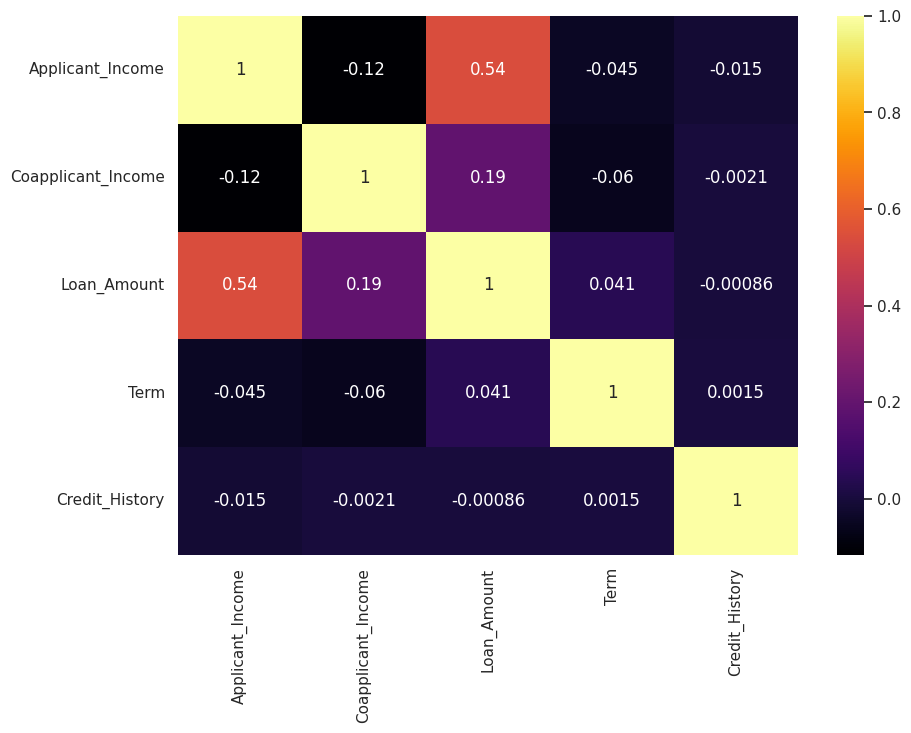

In [284]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

* Categorical 📊 - Categorical 📊

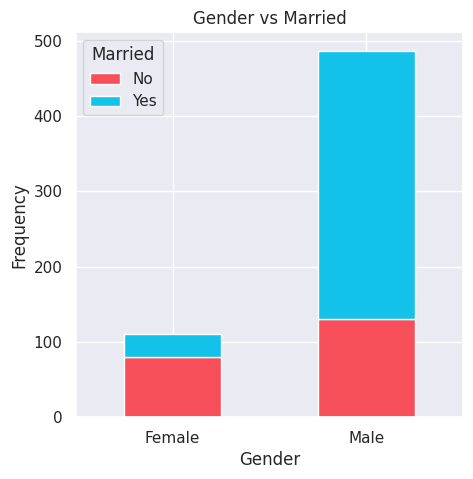

In [285]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

*Kebanyakan pelamar pria sudah menikah dibandingkan dengan pelamar wanita. Selain itu, jumlah pelamar pria yang belum menikah lebih banyak dibandingkan dengan pelamar wanita yang belum menikah.*

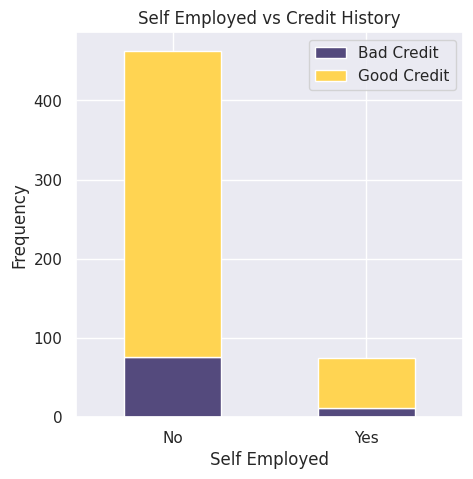

In [286]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

*Sebagian besar pelamar yang tidak bekerja sendiri memiliki kredit yang baik dibandingkan dengan pelamar yang bekerja sendiri.*

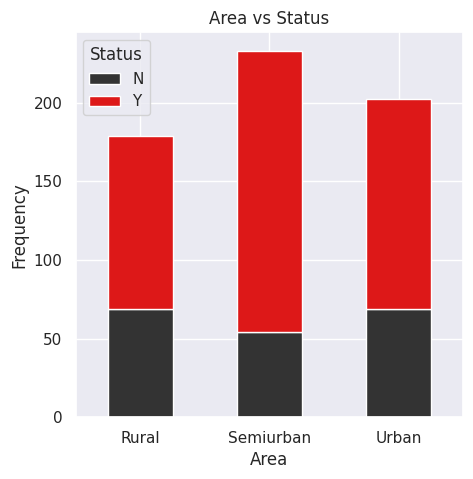

In [287]:
pd.crosstab(df.Area,df.Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Area vs Status')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

*Sebagian besar pinjaman yang diterima memiliki properti di Semiurban dibandingkan di Urban dan Rural.*

* Categorical 📊- Numerical 📈

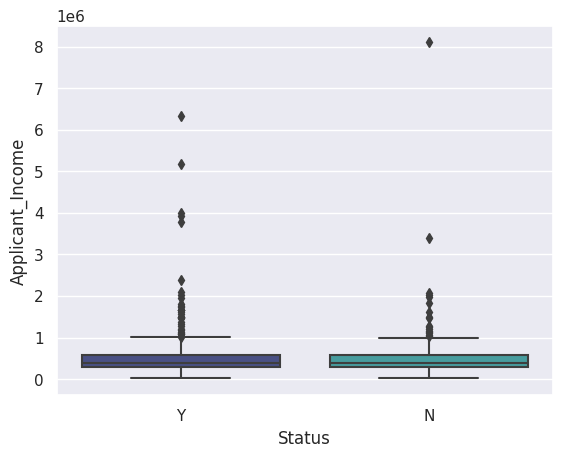

In [288]:
sns.boxplot(x="Status", y="Applicant_Income", data=df, palette="mako");

*Dapat dilihat bahwa banyak outlier dalam Applicant Income, dan distribusinya juga condong positif*

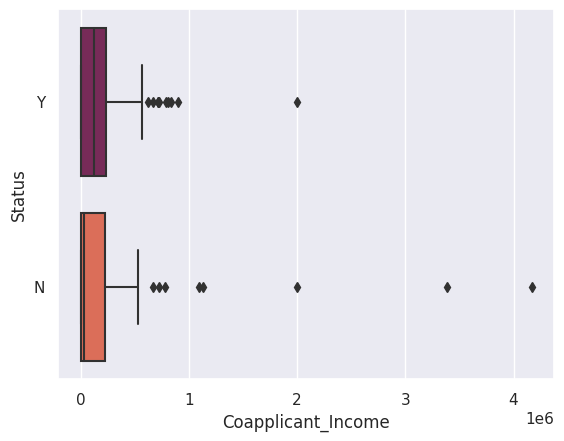

In [289]:
sns.boxplot(x="Coapplicant_Income", y="Status", data=df, palette="rocket");

*Jelas bahwa Co Applicant Income memiliki sejumlah outlier, dan distribusinya juga miring secara positif.*

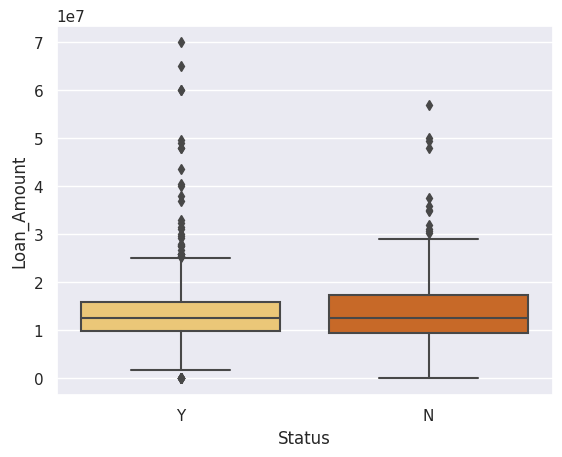

In [290]:
sns.boxplot(x="Status", y="Loan_Amount", data=df, palette="YlOrBr");

*Seperti yang bisa dilihat, Co Applicant Income memiliki jumlah outlier yang tinggi, dan distribusinya juga condong positif.*

* Numerical 📈 - Numerical 📈

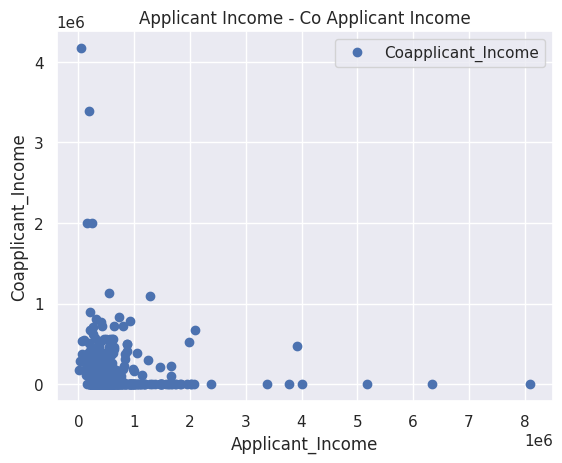

Pearson correlation: -0.11660458122889975
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915663, pvalue=1.4609839484240346e-40)


In [291]:
df.plot(x='Applicant_Income', y='Coapplicant_Income', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('Applicant_Income')
plt.ylabel('Coapplicant_Income')  
plt.show()
print('Pearson correlation:', df['Applicant_Income'].corr(df['Coapplicant_Income']))
print('T Test and P value: \n', stats.ttest_ind(df['Applicant_Income'], df['Coapplicant_Income']))

* Terdapat korelasi negatif antara pendapatan Pemohon dengan Pendapatan Co Applicant.
* Koefisien korelasi signifikan pada interval kepercayaan 95 persen, karena memiliki nilai p 1,46

**Null Values**

In [292]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

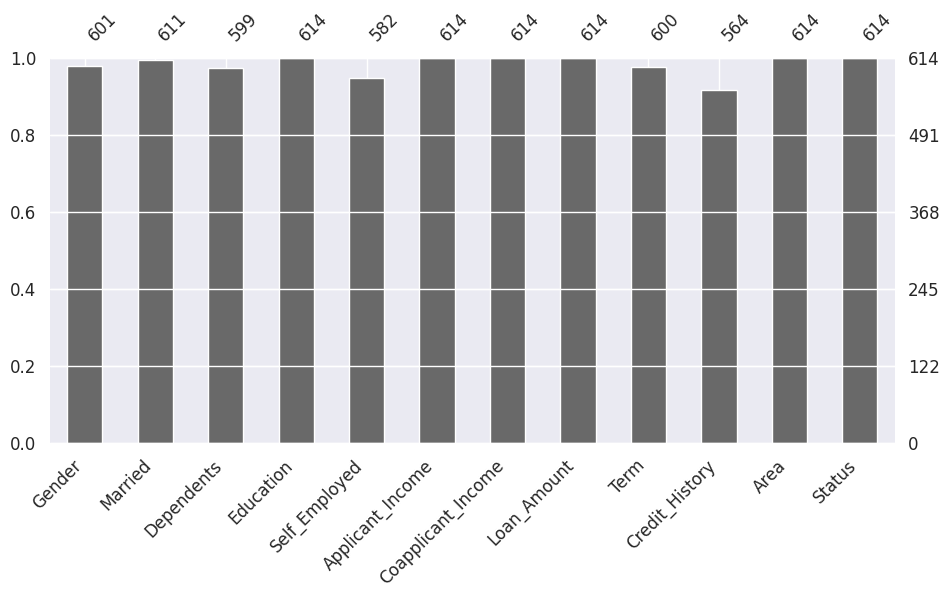

In [293]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

*Sebelumnya, nilai null telah dieksplorasi untuk Categorical Variables. Pada bagian ini, nilai null telah dieksplorasi untuk semua variabel dalam dataset.*

**8. Data Preprocessing**

*Variabel yang tidak perlu akan dibuang di bagian ini.*

**Data Imputation :**
Imputasi adalah teknik untuk mengganti nilai estimasi untuk nilai yang hilang dalam kumpulan data. Pada bagian ini akan dilakukan imputasi untuk variabel yang memiliki missing value.

**Categorical Variables :**
*Pada bagian ini, imputasi untuk variabel kategori akan dilakukan dengan menggunakan mode*

In [295]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Term'].fillna(df['Term'].mode()[0],inplace=True)

**Numerical Variables :**
Bagian selanjutnya adalah imputasi untuk numerical variables menggunakan rata-rata.

In [296]:
df['Loan_Amount'].fillna(df['Loan_Amount'].mean(),inplace=True)

**One-hot Encoding :**
Di bagian ini, kami akan mengubah categorical variables menjadi bentuk yang dapat disediakan oleh algoritme ML untuk melakukan prediksi yang lebih baik.

In [297]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Status_Y': 'Status'}
       
df.rename(columns=new, inplace=True)

**Remove Outliers & Infinite values :**
Karena ada outlier, maka outlier tersebut akan dihilangkan.

In [298]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

**Skewed Distribution Treatment :**
Pada bagian sebelumnya, telah ditunjukkan bahwa distribusi untuk ApplicantIncome, CoapplicantIncome, dan LoanAmount dengan hasil positif.
Kami akan menggunakan transformasi akar kuadrat untuk menormalkan distribusi.

In [299]:
# Square Root Transformation

df.Applicant_Income = np.sqrt(df.Applicant_Income)
df.Coapplicant_Income = np.sqrt(df.Coapplicant_Income)
df.Loan_Amount = np.sqrt(df.Loan_Amount)

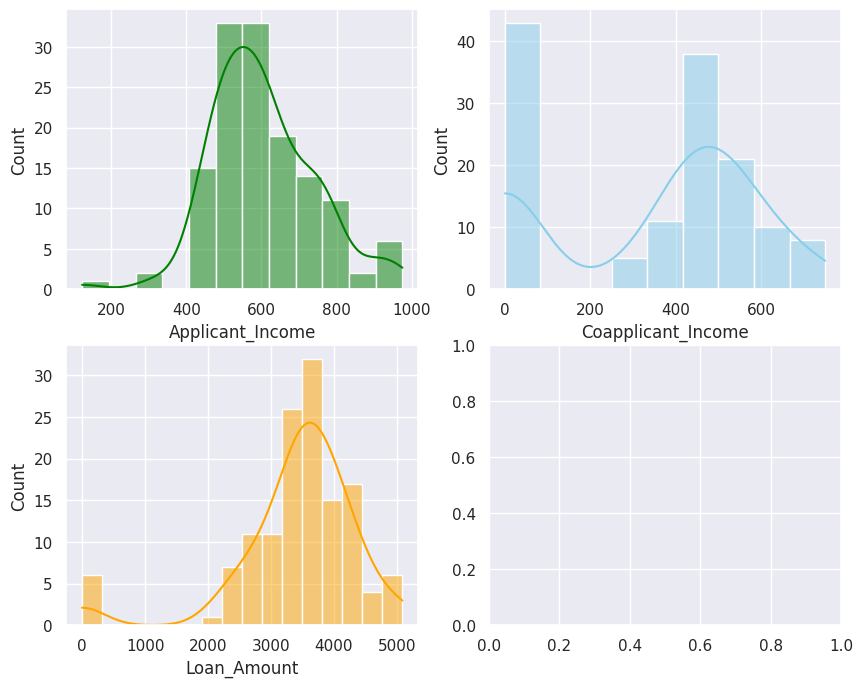

In [300]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="Applicant_Income", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="Coapplicant_Income", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="Loan_Amount", kde=True, ax=axs[1, 0], color='orange');

*Seperti dapat dilihat, distribusi setelah menggunakan transformasi log jauh lebih baik dibandingkan dengan distribusi aslinya.*

**Features Separating**
Fitur dependen (Status) akan dipisahkan dari fitur independen.

In [301]:
X = df.drop(["Status"], axis=1)
y = df["Status"]

**SMOTE Technique :**
Pada eksplorasi sebelumnya terlihat bahwa jumlah pinjaman yang disetujui dan yang ditolak tidak berimbang. Pada bagian ini, teknik oversampling akan digunakan untuk menghindari overfitting,

In [303]:
X, y = SMOTE().fit_resample(X, y)

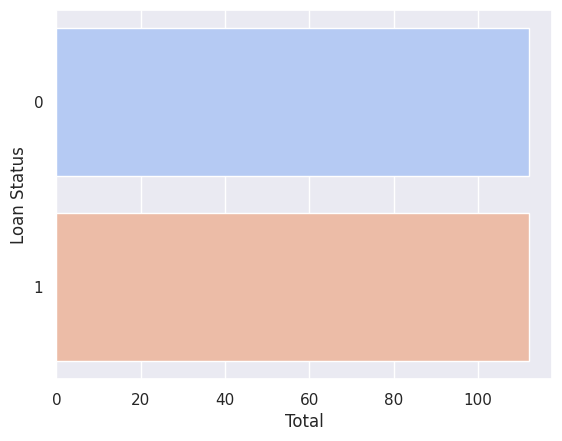

In [304]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

*Seperti yang terlihat, Status Pinjaman kini berimbang.*

**Data Normalization :**
Pada bagian ini akan dilakukan normalisasi data untuk menormalkan range variabel independen atau fitur data.

In [305]:
X = MinMaxScaler().fit_transform(X)

**Splitting Data Set :**
Kumpulan data akan dibagi menjadi 80% training dan 20% uji.

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**9. Model Klasifikasi**

***K-Nearest Neighbour (KNN)***

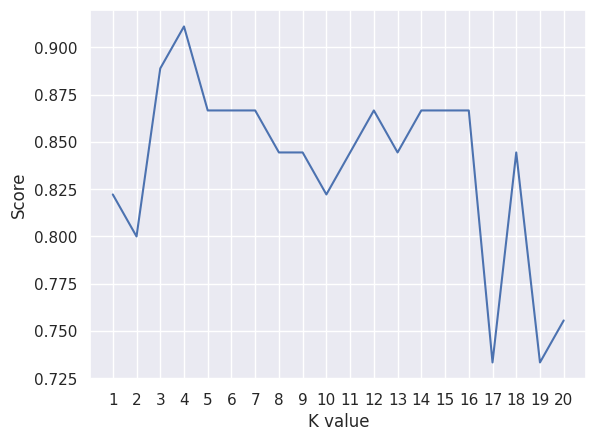

KNN best accuracy: 91.11%


In [308]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

**Naive Bayes**

***Categorical Naive Bayes***

In [309]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        23
           1       1.00      0.64      0.78        22

    accuracy                           0.82        45
   macro avg       0.87      0.82      0.81        45
weighted avg       0.87      0.82      0.82        45

[[23  0]
 [ 8 14]]
Categorical Naive Bayes accuracy: 82.22%


***Gaussian Naive Bayes***

In [310]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77        23
           1       0.81      0.59      0.68        22

    accuracy                           0.73        45
   macro avg       0.75      0.73      0.73        45
weighted avg       0.75      0.73      0.73        45

[[20  3]
 [ 9 13]]
Gaussian Naive Bayes accuracy: 73.33%


**10. Model Comparison**

In [311]:
compare = pd.DataFrame({'Model': ['K Neighbors', 
                                  'Categorical NB', 
                                  'Gaussian NB'], 
                        'Accuracy': [KNAcc*100,NBAcc1*100, NBAcc2*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,K Neighbors,91.111111
1,Categorical NB,82.222222
2,Gaussian NB,73.333333


*Secara umum terlihat bahwa semua model dapat mencapai akurasi hingga 70%. Akurasi tertinggi adalah 93%%.*